In [12]:
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md

In [18]:
traj = md.load_xtc('./step5_comb_noPBC.xtc', top='./step5_1_nowater.gro')

[     0.    100.    200. ...  99800.  99900. 100000.]


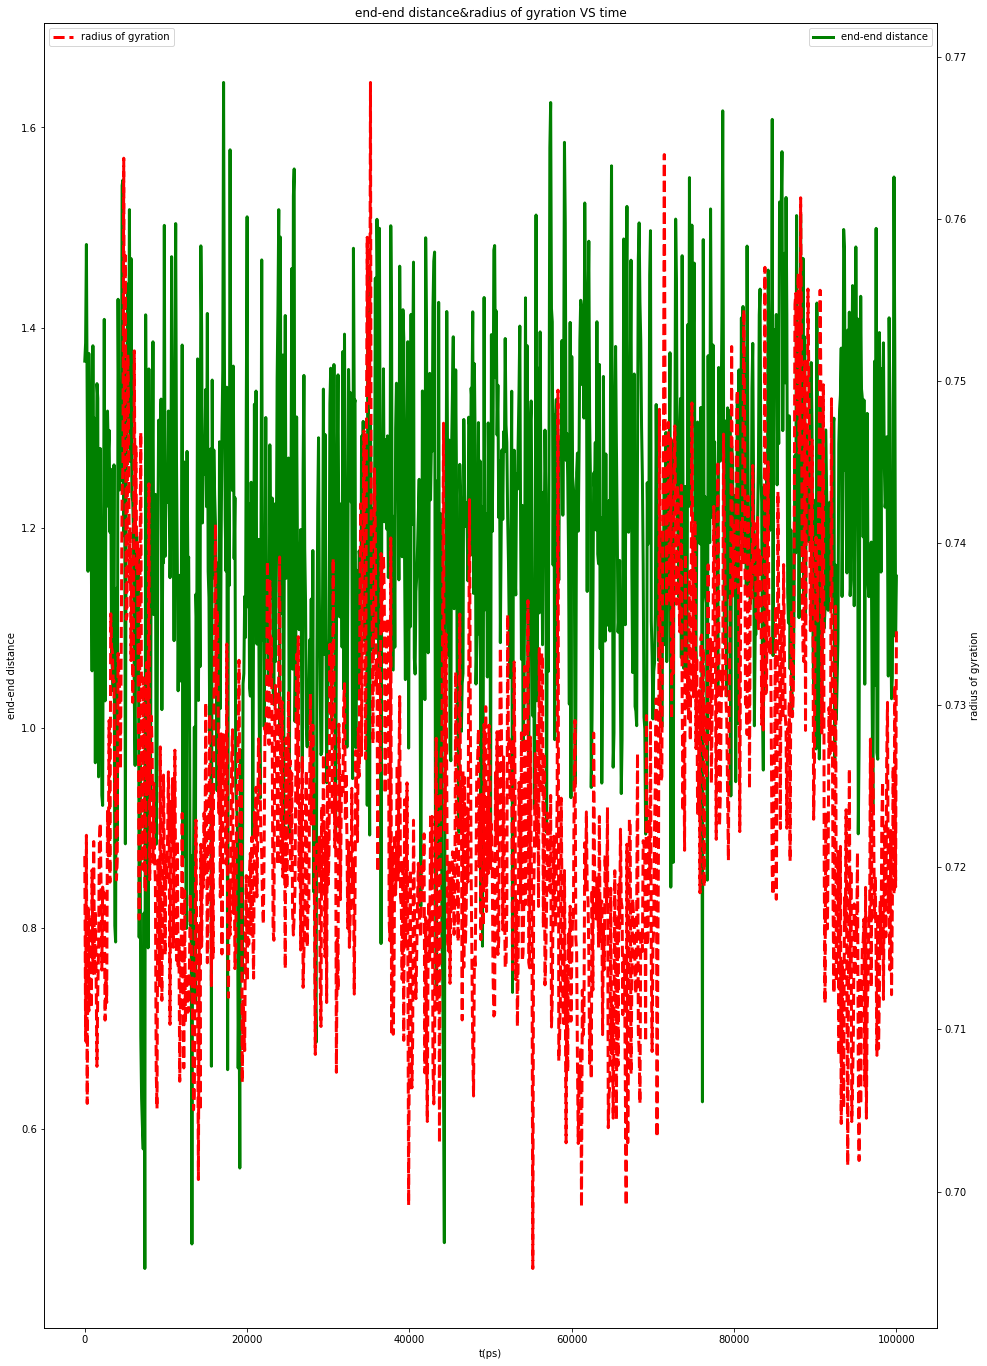

In [19]:
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)
gyration = md.compute_rg(traj, masses=None)
#plot distance vs time
#plt.plot(traj.time, dist)

x_a = traj.time
print(traj.time)
y_a1 = dist
y_a2 = gyration
fig = plt.figure(num=3,figsize=(16,24),facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(x_a, y_a1,'g',linewidth=3,linestyle='solid',label='end-end distance')
ax1.set_ylabel('end-end distance')
ax1.set_title("end-end distance&radius of gyration VS time")
ax2 = ax1.twinx()  # this is the important function
ax2.plot(x_a, y_a2, 'r',linewidth=3,linestyle='dashed',label='radius of gyration')#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('radius of gyration')
ax1.set_xlabel('t(ps)')
ax1.legend(loc='upper right')
ax2.legend(loc= 'upper left')
plt.savefig('./EEdist&Rg.png')
plt.show()

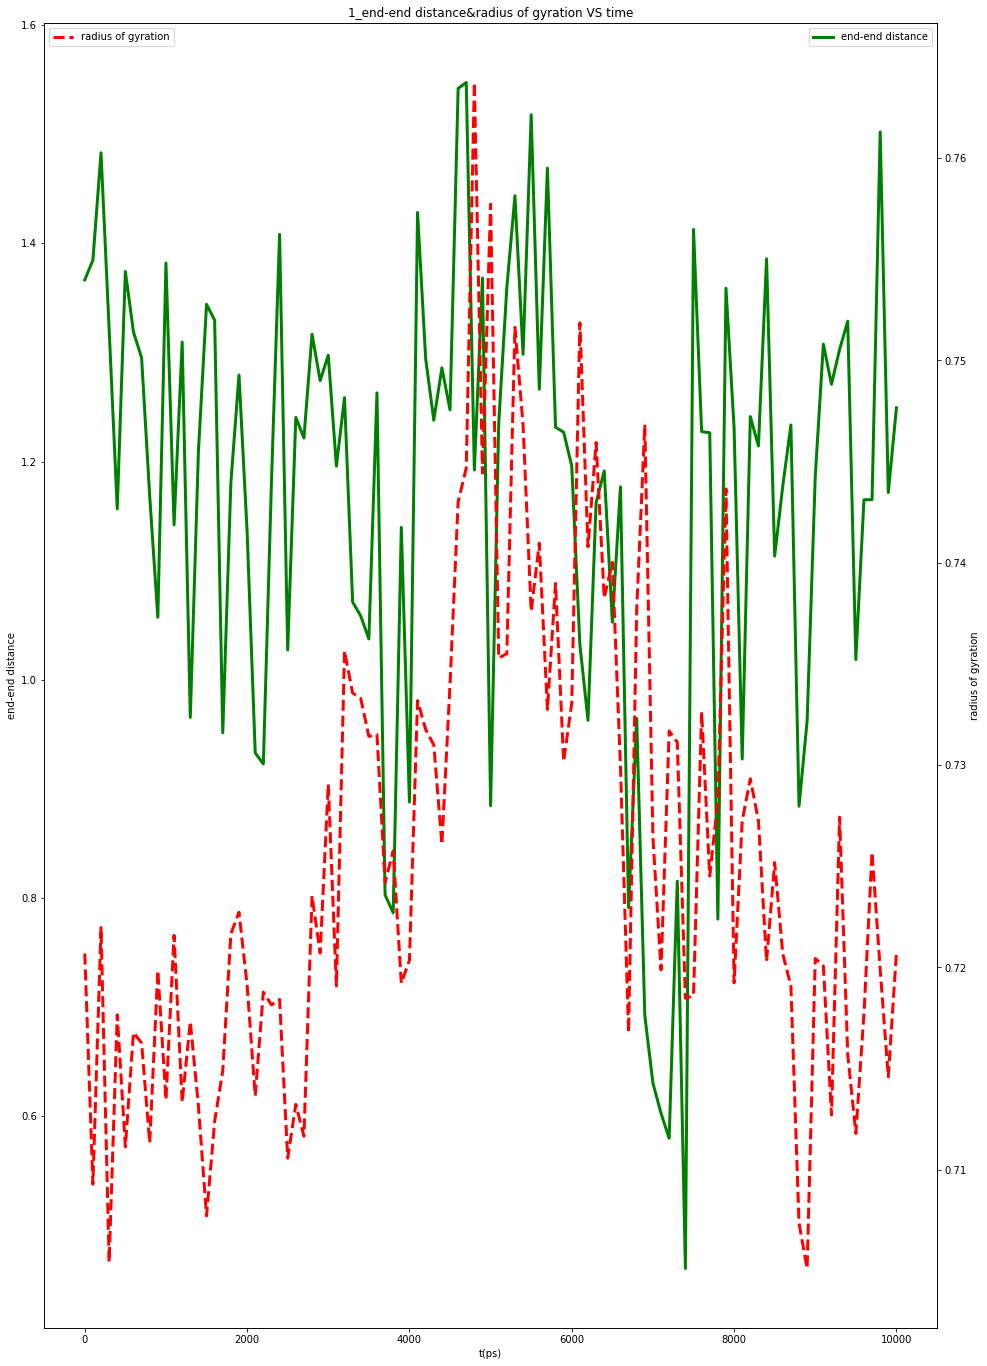

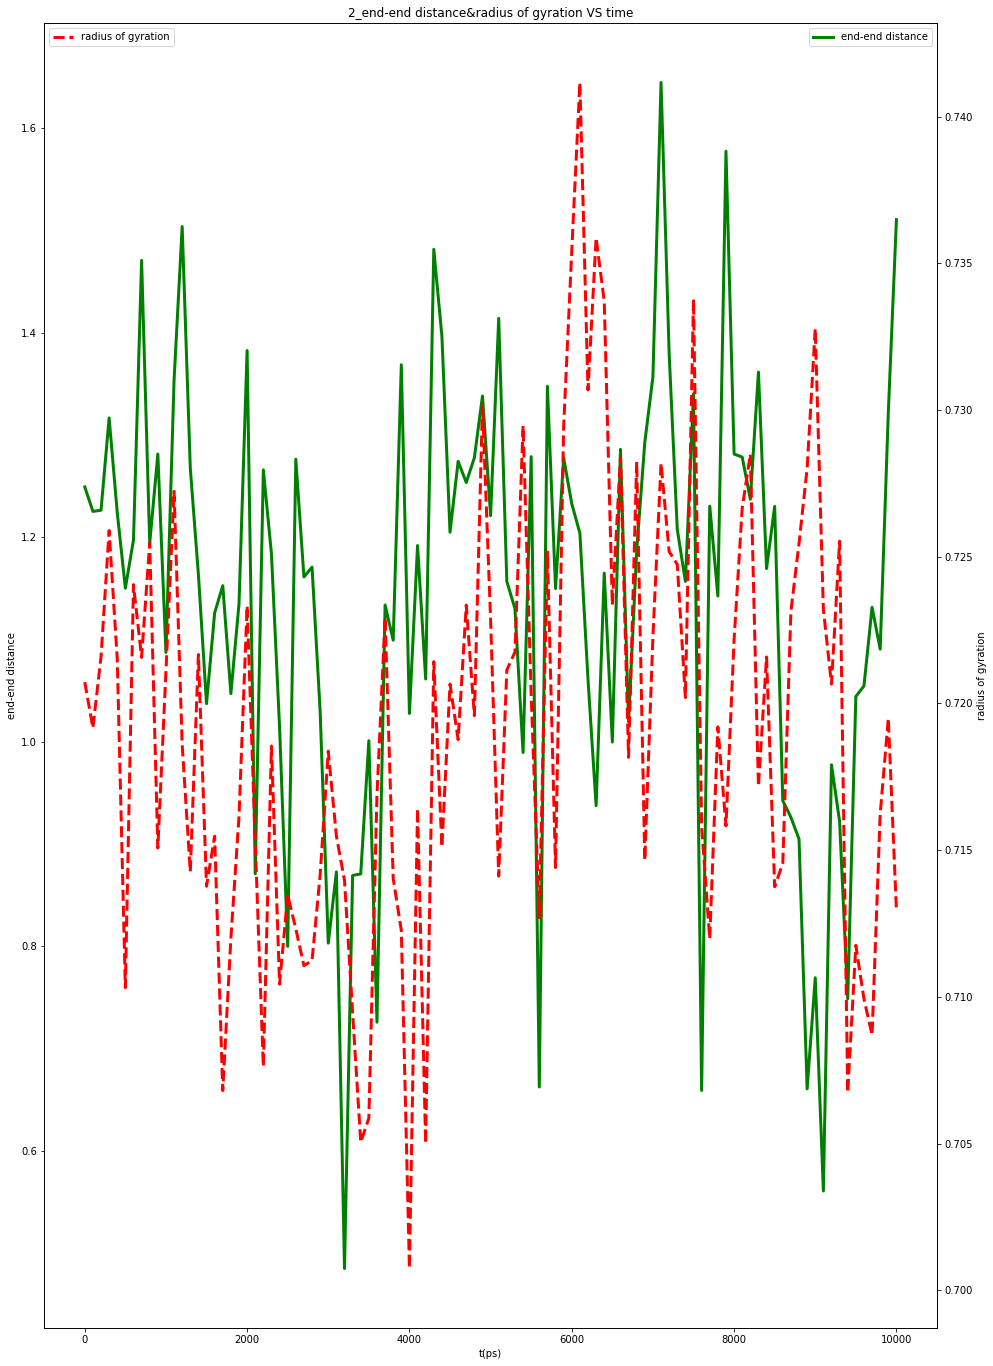

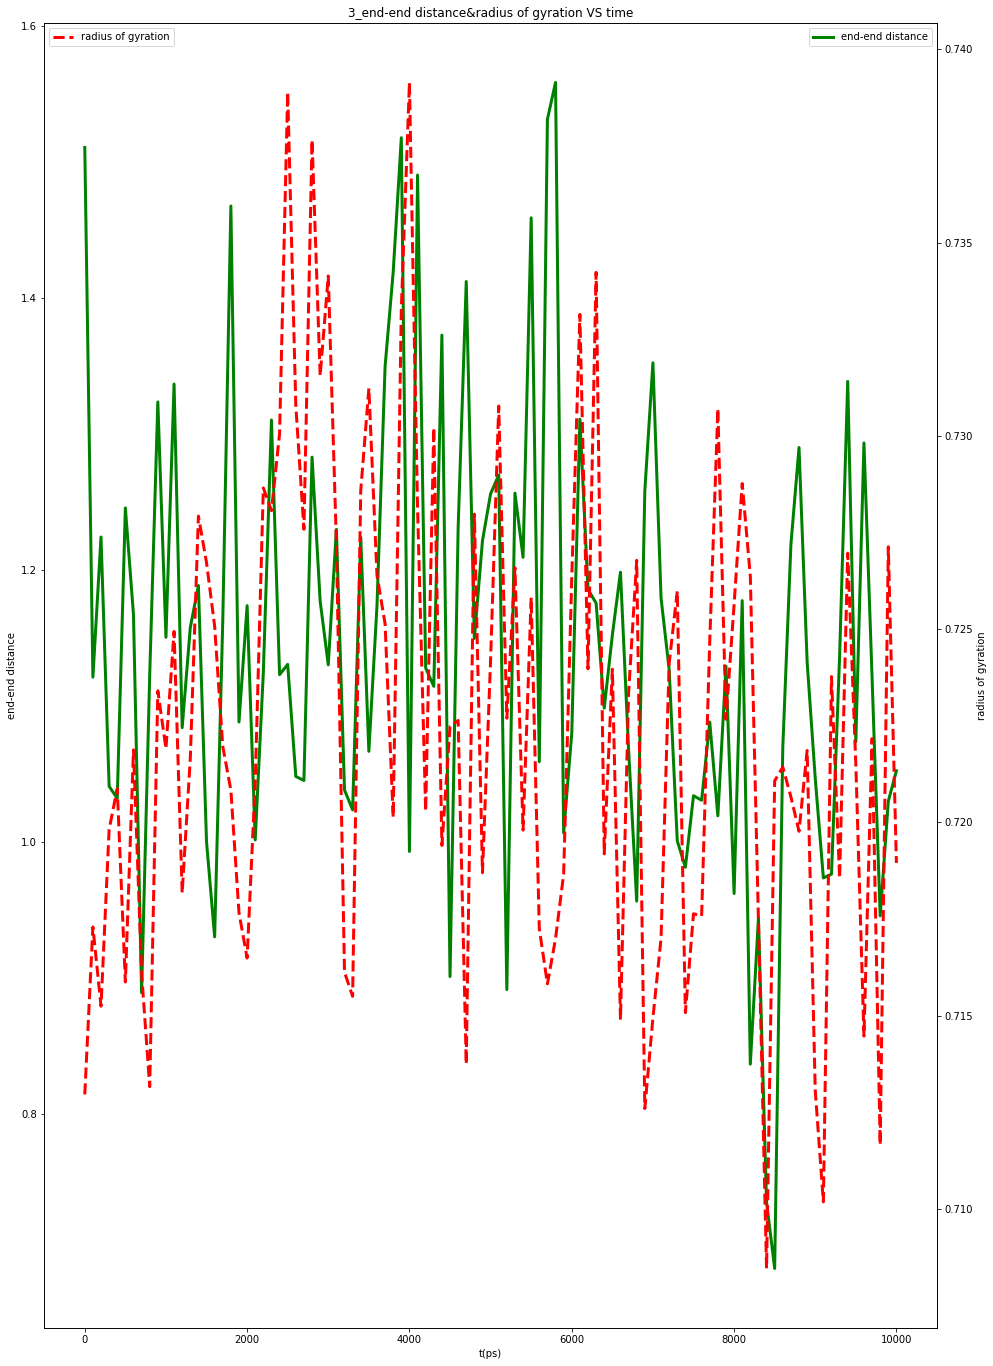

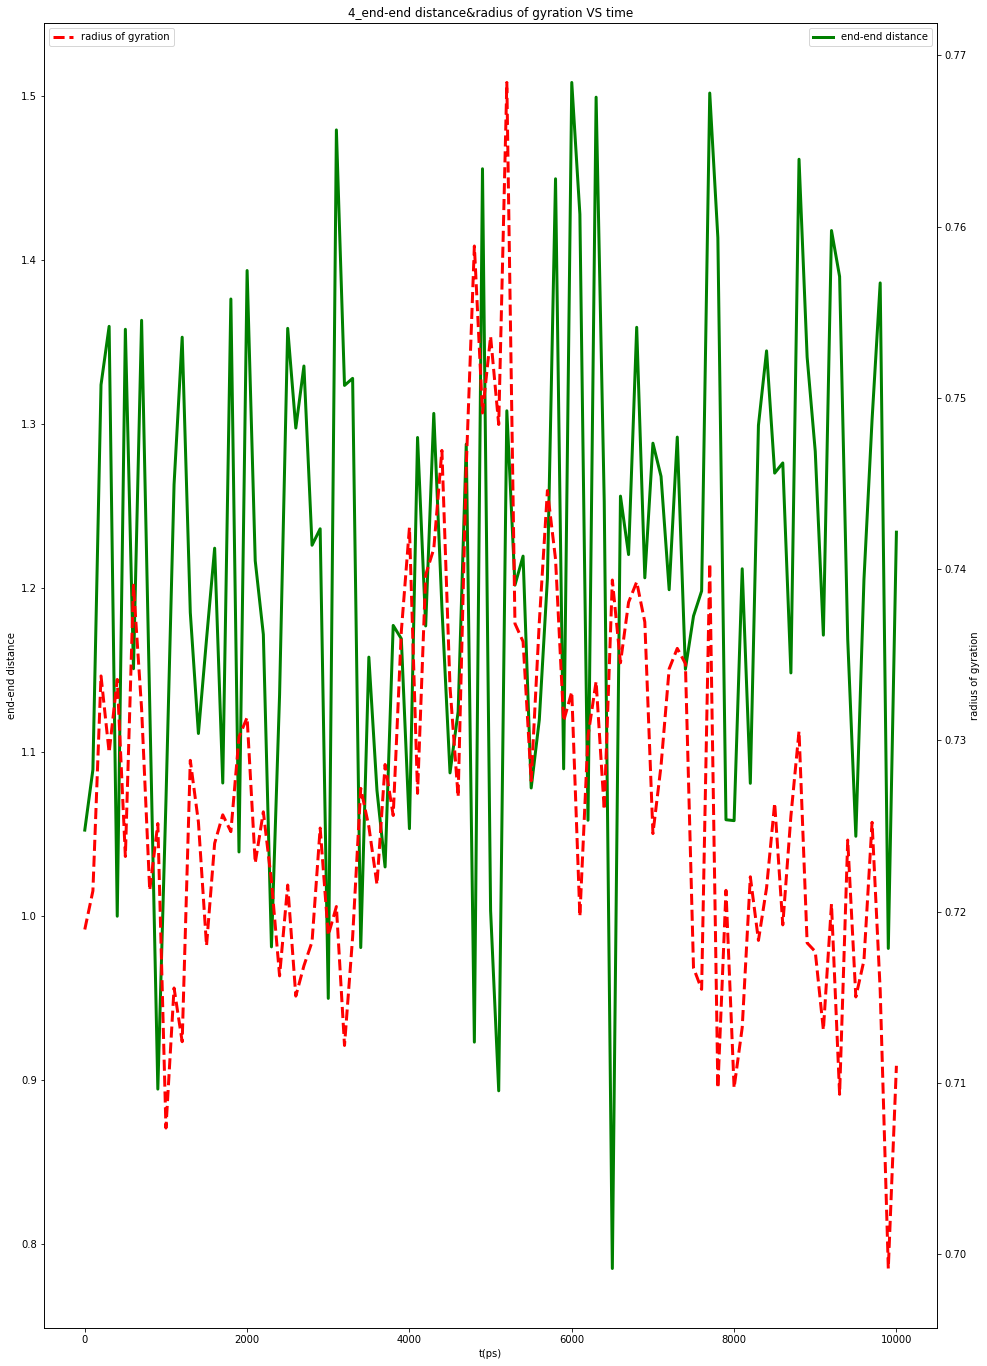

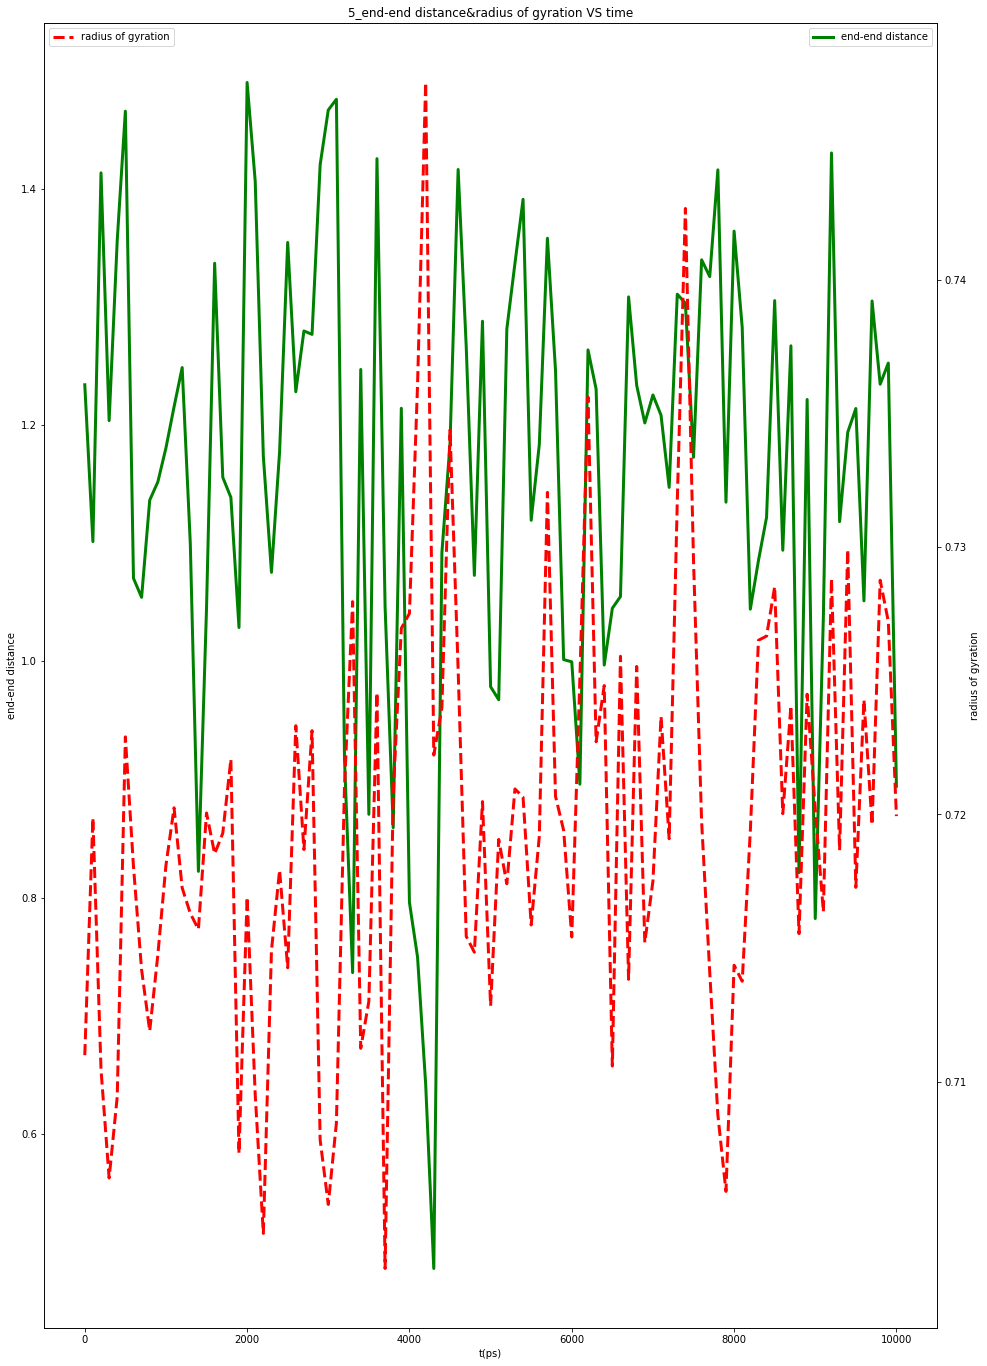

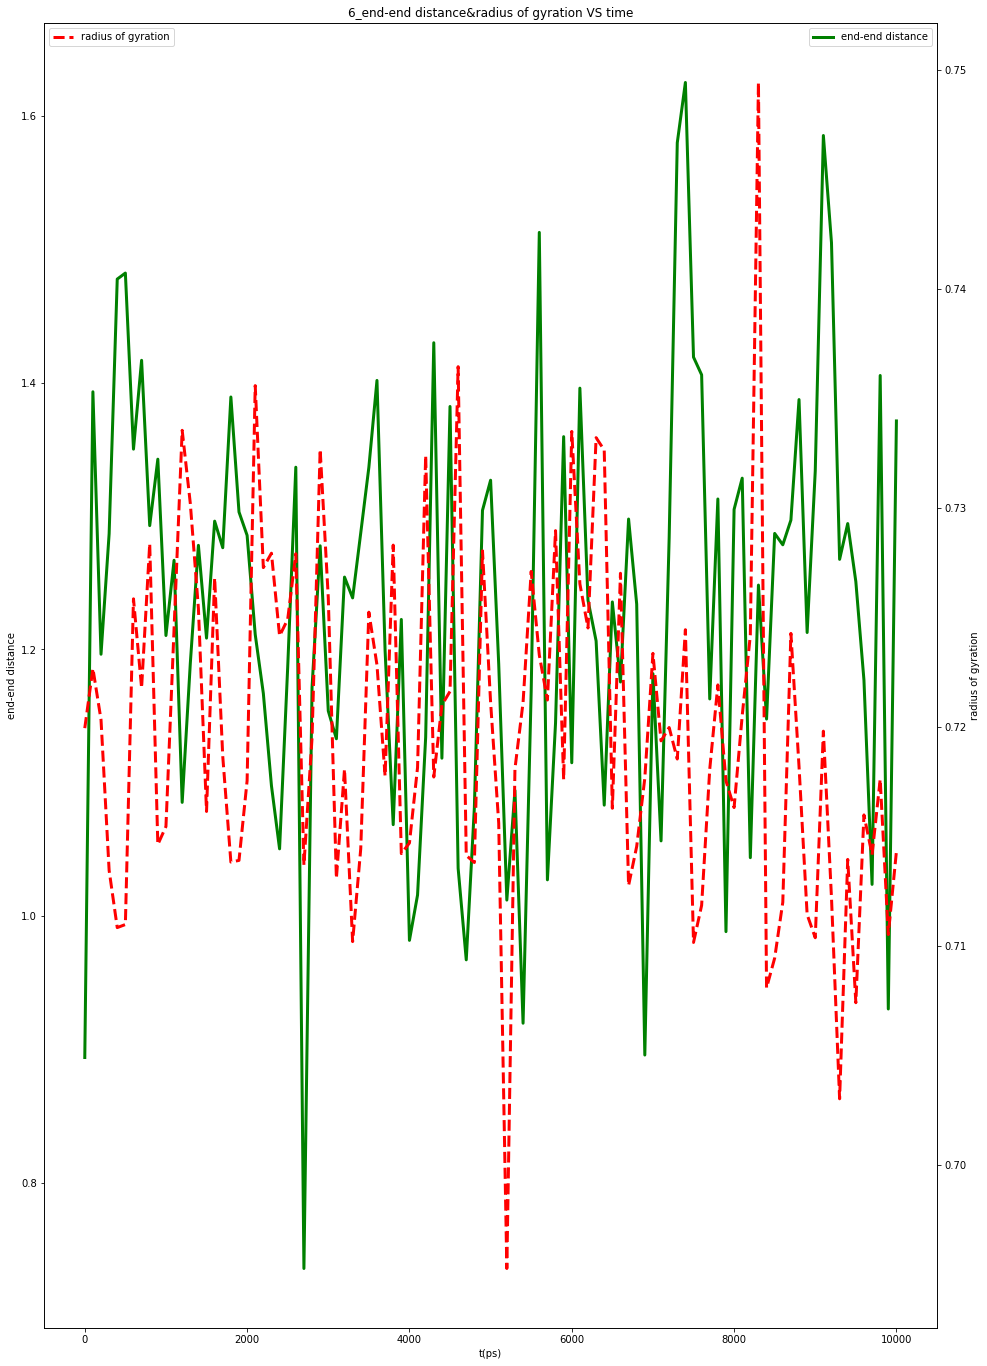

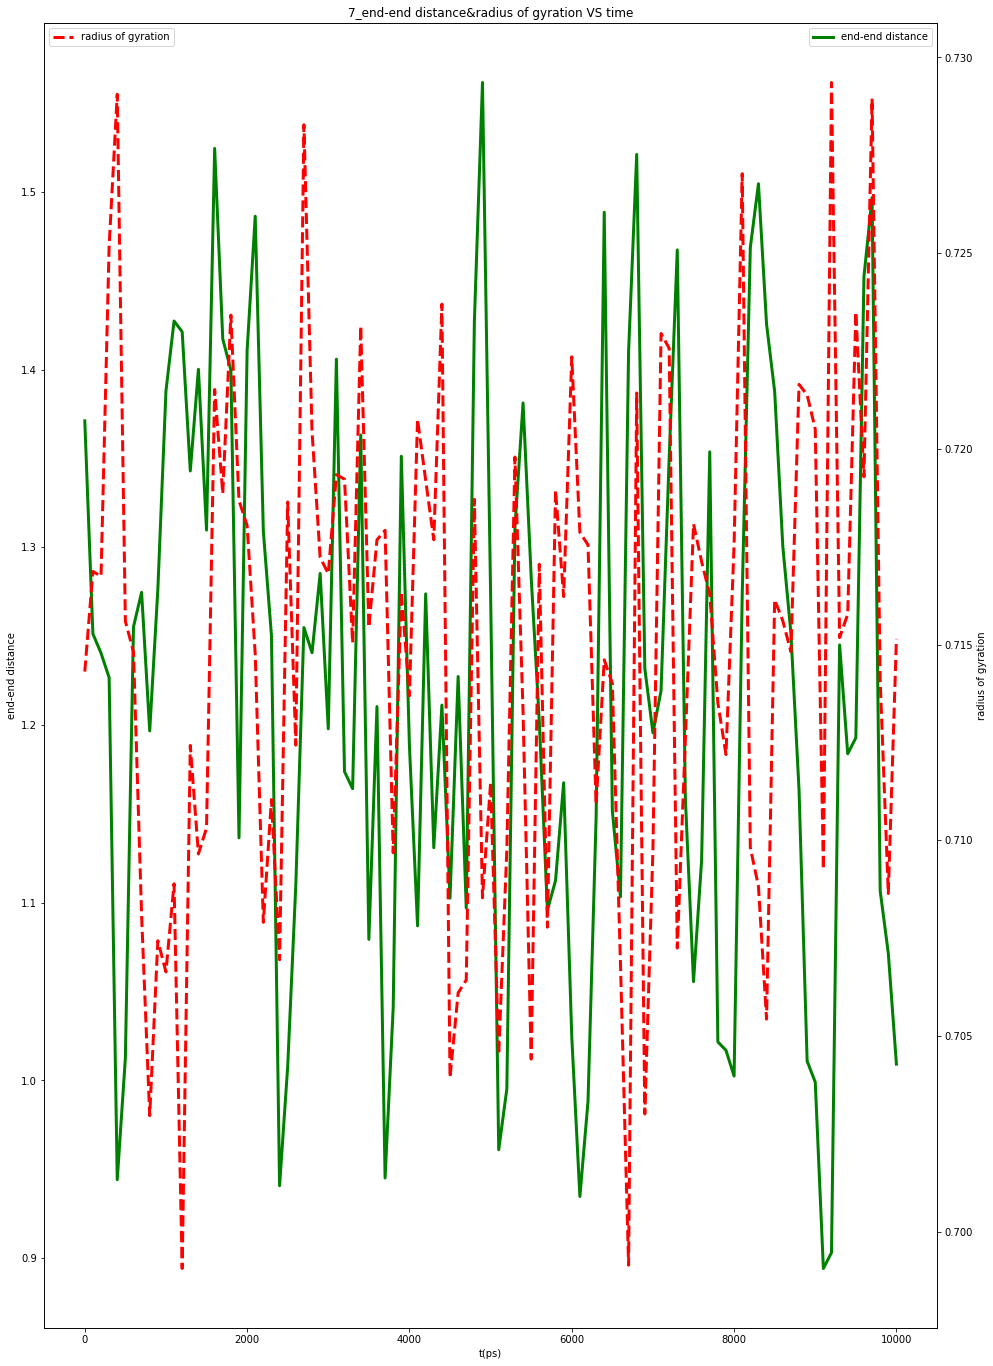

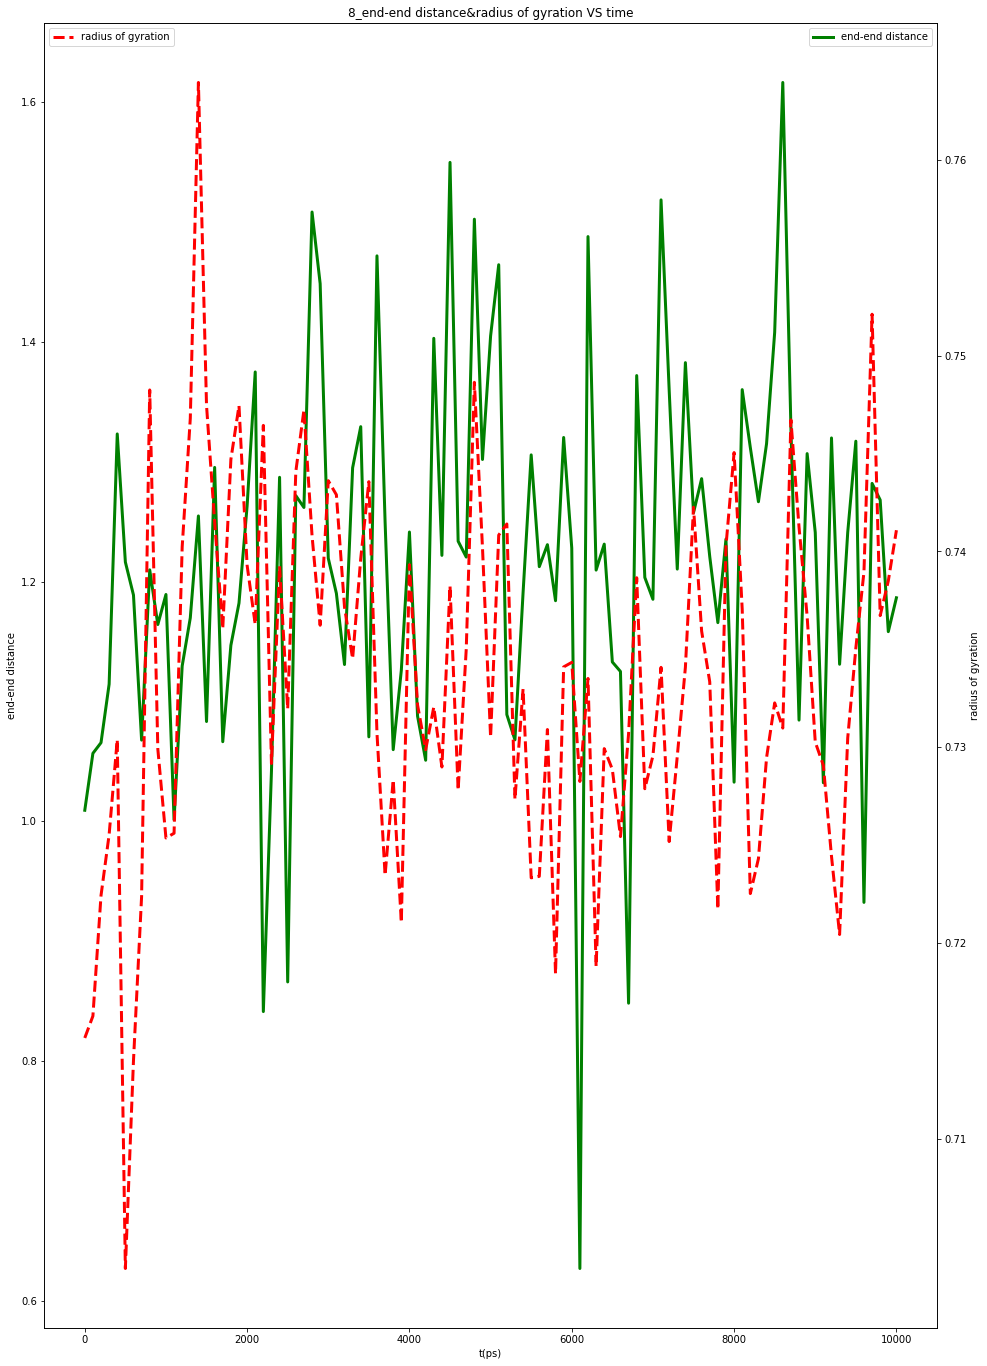

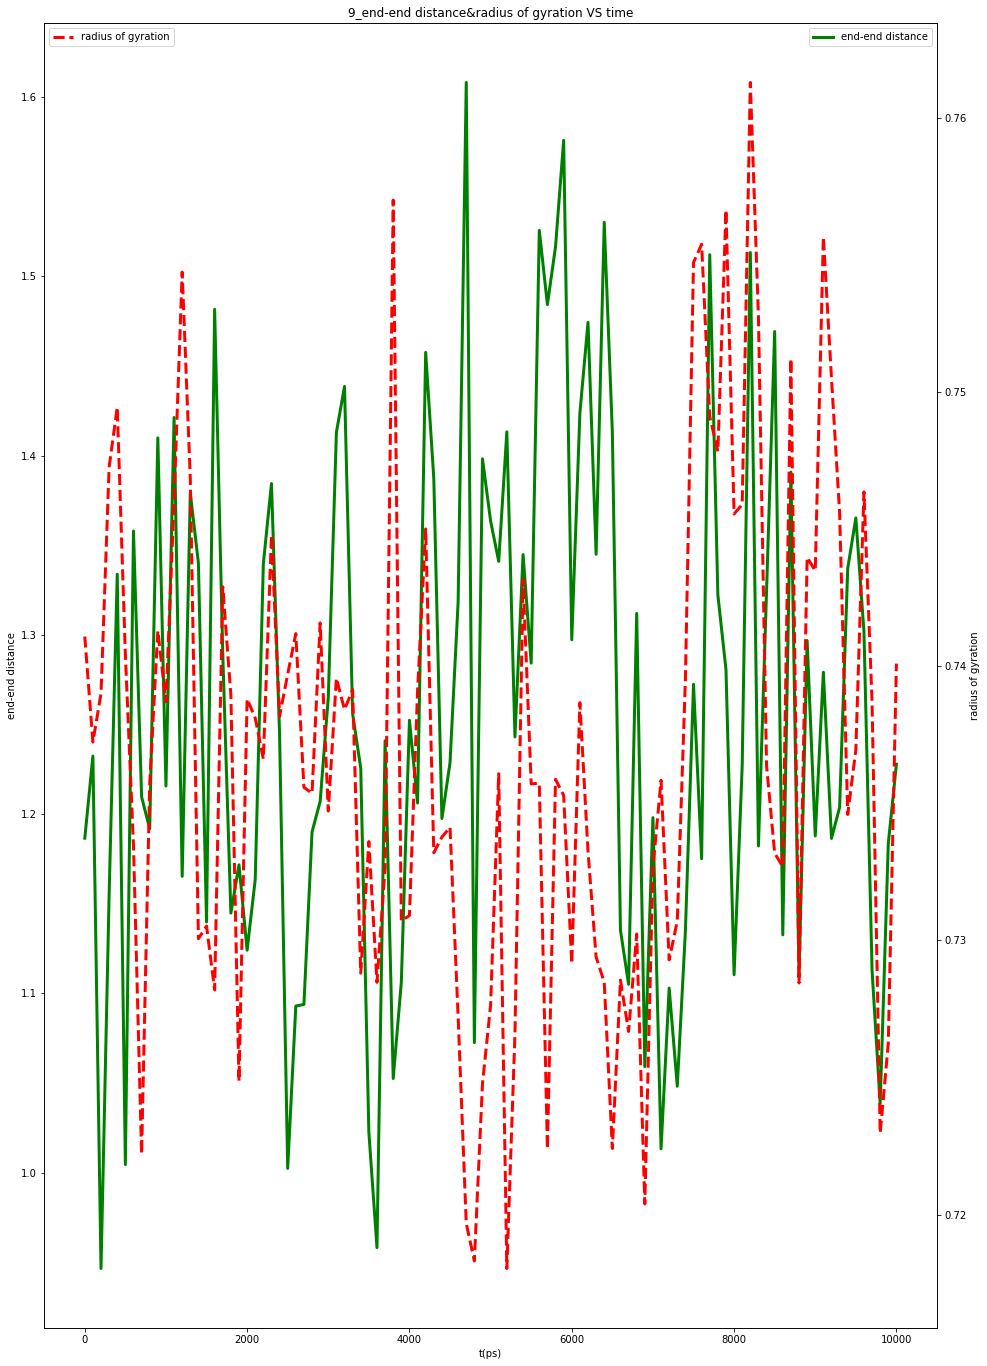

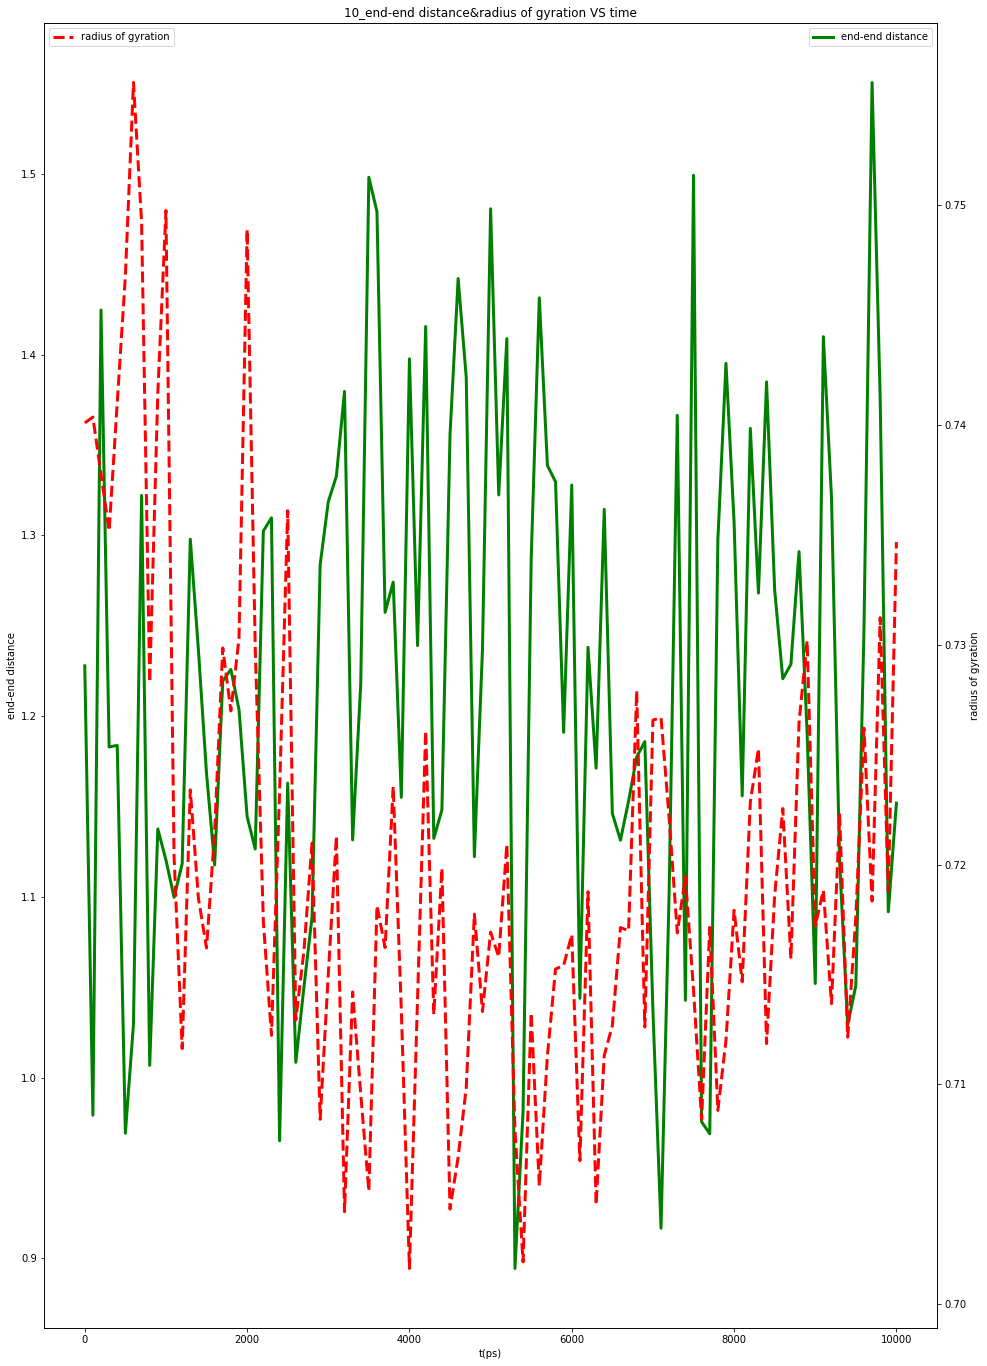

In [8]:
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist


for i in range(1,11):
    traj_path = './step5_'+str(i)+'_noPBC_nowater.xtc'
    traj = md.load_xtc(traj_path, top='./step5_1_nowater.gro')
    title = str(i)+'_end-end distance&radius of gyration VS time'
    # compute the distance between the first and last atom
    dist = end_end(traj)
    gyration = md.compute_rg(traj, masses=None)
    #plot distance vs time
    #plt.plot(traj.time, dist)

    x_a = traj.time
    y_a1 = dist
    y_a2 = gyration
    fig = plt.figure(num=3,figsize=(16,24),facecolor='w')
    ax1 = fig.add_subplot(111)
    ax1.plot(x_a, y_a1,'g',linewidth=3,linestyle='solid',label='end-end distance')
    ax1.set_ylabel('end-end distance')
    ax1.set_title(title)
    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(x_a, y_a2, 'r',linewidth=3,linestyle='dashed',label='radius of gyration')#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    #ax2.set_xlim([0, np.e])
    ax2.set_ylabel('radius of gyration')
    ax1.set_xlabel('t(ps)')
    ax1.legend(loc='upper right')
    ax2.legend(loc= 'upper left')
    plt.show()